In [75]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [77]:
# comvert target feature into labelencoding
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [78]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [79]:
X = df.drop('species',axis=1)
y = df['species']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = RandomForestClassifier(n_estimators=100) # criterion='entropy',max_depth=10 (more paremeters used for hyper parameter tuning)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
y_pred = model.predict(X_test)

print('classification_report:\n' , classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.87      0.87        15
           2       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [82]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

petal_length    0.525829
petal_width     0.371627
sepal_length    0.083386
sepal_width     0.019158
dtype: float64

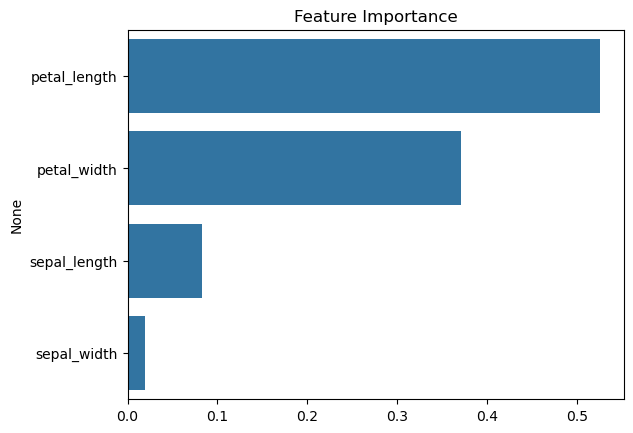

In [83]:
sns.barplot(x=feature_imp.values, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()
